<a href="https://colab.research.google.com/github/aatharvauti/Forecasting-a-Pandemic/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI & ML for Disease Management: Predicting Disease Spread and Preparedness**

### Project by - CYSE BE Students for AI ML Honors
##### **Atharva Auti (BE15-1), Aryan Doshi (BE15-8), Mihir Doshi (BE15-67), and Sahil Raulo (BE15-36)**

---

### Problem Statement

The recent pandemic has highlighted the crucial role of machine learning in managing and controlling the spread of
diseases. This project aims to leverage AI and ML techniques, such as ARIMA, logistic curves, linear regression, and SARIMA, to calculate the rate of disease spread and predict the number of deaths, recoveries, and confirmed cases.

By accurately forecasting disease trends, this work aims to help healthcare authorities and policymakers better prepare and implement effective strategies to combat the disease and ensure the community’s survival.


### Data Collection and Preprocessing

The data collected is related to COVID 19 Data from the year 2020 to 2023. It is publicly available on the WHO website at https://covid19.who.int/data.

The excel sourced is reduced and remade only to contain the data for specific countries. The reformatted data is stored in the datasets/ directory.

In [ ]:
! pip install pandas

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Enter a nation to analyse it's COVID data and make forecasts (all CAPS only)
country = 'INDIA'

# Available options: INDIA, USA, UK, FRANCE, JAPAN, KOREA

In [ ]:
# Step 2: Load the CSV file into a Pandas DataFrame
# Replace '.csv' with the actual file path to your dataset.
data = pd.read_csv(f'/content/drive/MyDrive/AI ML Project/dataset/COVID-2020-2021-{country}.csv')

In [ ]:
# Step 3: Display the first few rows of the dataset to inspect its structure
print(data.head())

  Date_reported Country_code Country WHO_region  New_cases  Cumulative_cases  \
0    2020-01-03           IN   India      SEARO          0                 0   
1    2020-01-04           IN   India      SEARO          0                 0   
2    2020-01-05           IN   India      SEARO          0                 0   
3    2020-01-06           IN   India      SEARO          0                 0   
4    2020-01-07           IN   India      SEARO          0                 0   

   New_deaths  Cumulative_deaths  
0           0                  0  
1           0                  0  
2           0                  0  
3           0                  0  
4           0                  0  


In [ ]:
# Step 4: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [ ]:
# Step 5: Remove duplicates if any
data.drop_duplicates(inplace=True)

In [ ]:
# Step 6: Convert the 'Date_reported' column to datetime data type
data['Date_reported'] = pd.to_datetime(data['Date_reported'])

In [ ]:
# Step 7: Set 'Date_reported' as the index (useful for time series analysis)
data.set_index('Date_reported', inplace=True)

In [ ]:
# Step 8: Sort the DataFrame by date in ascending order
data.sort_index(inplace=True)

### Data Visualization

After finishing the collection and preprocessing, we need to visualize the data.

In this step, we create visualizations to gain insights into the data. We use libraries like Matplotlib and Seaborn to create plots and graphs that show the trends and patterns in the disease data.

In [ ]:
! pip install matplotlib seaborn

In [ ]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Create subplots for visualization
plt.figure(figsize=(40, 6))

<Figure size 4000x600 with 0 Axes>

<Figure size 4000x600 with 0 Axes>

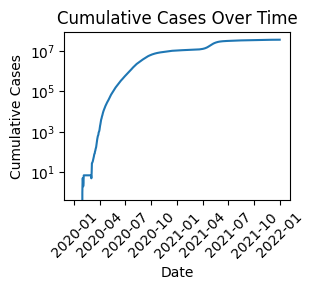

In [ ]:
# Step 3: Plot confirmed cases over time
plt.subplot(2, 2, 1)
sns.lineplot(x=data.index, y=data['Cumulative_cases'], data=data)
plt.title("Cumulative Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.xticks(rotation=45)
plt.yscale('log')  # Set the y-axis scale to logarithmic for better visualization


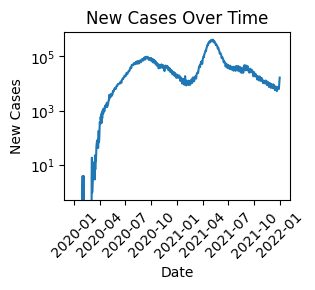

In [ ]:
# Step 4: Plot new cases over time
plt.subplot(2, 2, 2)
sns.lineplot(x=data.index, y=data['New_cases'], data=data)
plt.title("New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.yscale('log')  # Set the y-axis scale to logarithmic for better visualization


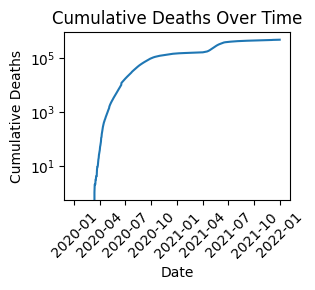

In [ ]:
# Step 5: Plot cumulative deaths over time
plt.subplot(2, 2, 3)
sns.lineplot(x=data.index, y=data['Cumulative_deaths'], data=data)
plt.title("Cumulative Deaths Over Time")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Cumulative Deaths")
plt.yscale('log')  # Set the y-axis scale to logarithmic for better visualization


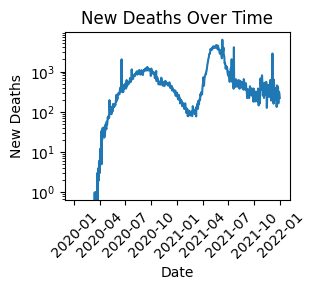

In [ ]:
# Step 6: Plot new deaths over time
plt.subplot(2, 2, 4)
sns.lineplot(x=data.index, y=data['New_deaths'], data=data)
plt.title("New Deaths Over Time")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("New Deaths")
plt.yscale('log')  # Set the y-axis scale to logarithmic for better visualization

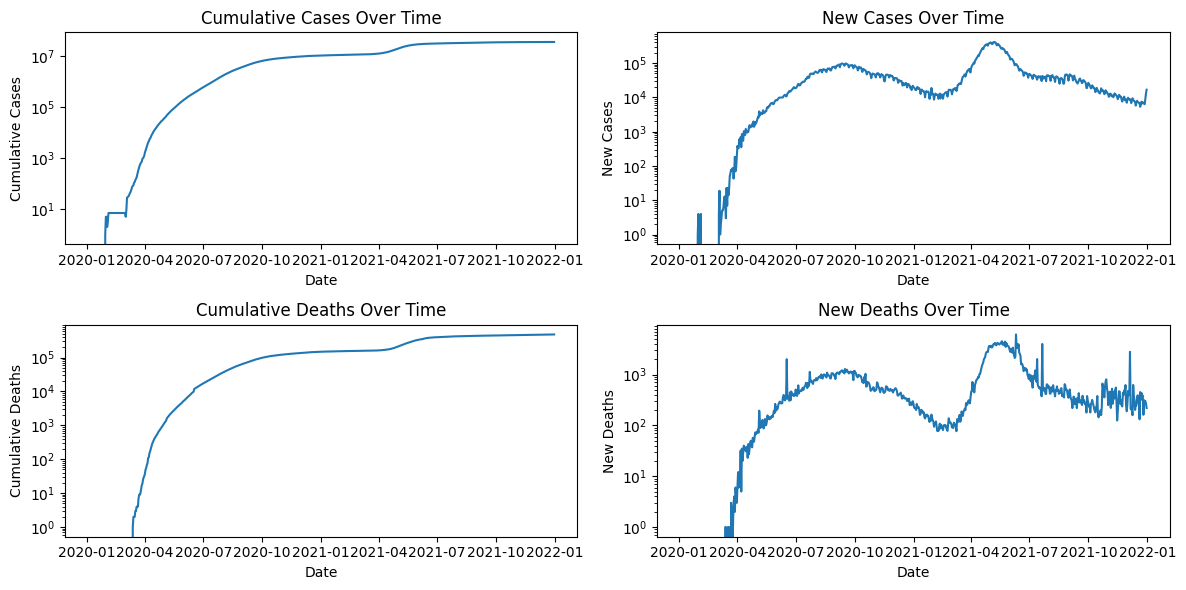

In [ ]:
# Create subplots with custom layout
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot cumulative cases over time
sns.lineplot(x=data.index, y=data['Cumulative_cases'], data=data, ax=axes[0, 0])
axes[0, 0].set_title("Cumulative Cases Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Cumulative Cases")
axes[0, 0].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot new cases over time
sns.lineplot(x=data.index, y=data['New_cases'], data=data, ax=axes[0, 1])
axes[0, 1].set_title("New Cases Over Time")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("New Cases")
axes[0, 1].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot cumulative deaths over time
sns.lineplot(x=data.index, y=data['Cumulative_deaths'], data=data, ax=axes[1, 0])
axes[1, 0].set_title("Cumulative Deaths Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Cumulative Deaths")
axes[1, 0].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot new deaths over time
sns.lineplot(x=data.index, y=data['New_deaths'], data=data, ax=axes[1, 1])
axes[1, 1].set_title("New Deaths Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("New Deaths")
axes[1, 1].set_yscale('log')  # Set the y-axis scale to logarithmic

# Customize layout
fig.tight_layout()

# Show the plots
plt.show()


### Time series analysis

The time series analysis is an essential step in understanding and forecasting disease spread. There are various techniques you can use. Let's start with basic time series analysis using Autoregressive Integrated Moving Average (ARIMA) modeling.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression

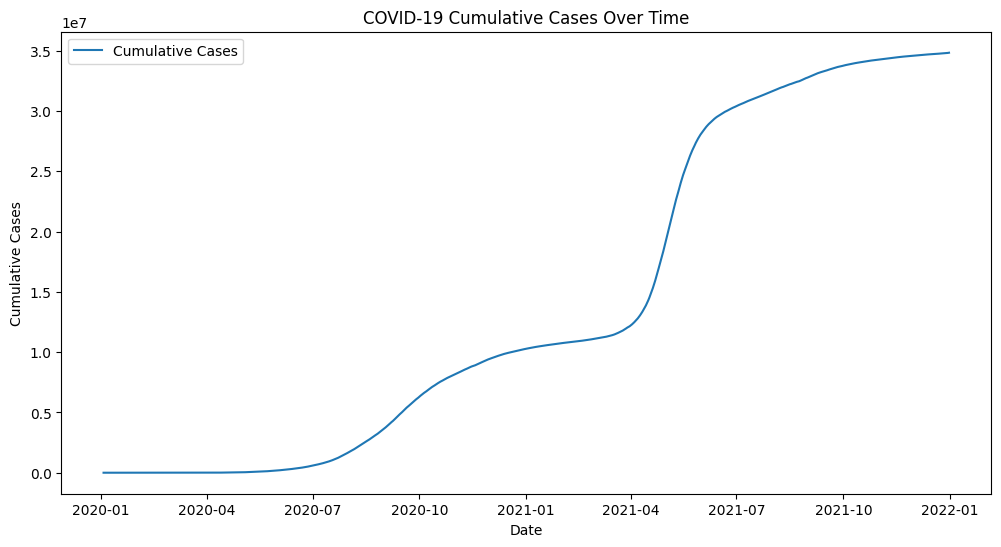

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Over Time')
plt.legend(loc='best')
plt.show()

Time series models like ARIMA work best with stationary data. We use the Augmented Dickey-Fuller test to check for stationarity.

In [ ]:
result = adfuller(data['Cumulative_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.029089830913911024
p-value: 0.9608726903967897
Critical Values: {'1%': -3.439620010600208, '5%': -2.8656309041017756, '10%': -2.5689484851894413}


If the p-value is less than a chosen significance level (e.g., 0.05), we can consider the data stationary

In this case, the data is **not** stationary.

Now that the data is not stationary, we need to make it through differencing. Typically, we will apply differencing until the data becomes stationary.

In [ ]:
# Perform differencing to make the data stationary
data['Diff_Cumulative_cases'] = data['Cumulative_cases'].diff().fillna(0)  # You can adjust the fillna method as needed

# Re-check stationarity
result = adfuller(data['Diff_Cumulative_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.7188348934076387
p-value: 0.07083533349186555
Critical Values: {'1%': -3.439620010600208, '5%': -2.8656309041017756, '10%': -2.5689484851894413}


In [ ]:
# Specify the order (p, d, q)
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 0  # Moving average order

# Re-fit the ARIMA model
model = sm.tsa.ARIMA(data['Diff_Cumulative_cases'], order=(p, d, q))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Diff_Cumulative_cases   No. Observations:                  729
Model:                    ARIMA(1, 1, 0)   Log Likelihood               -7396.674
Date:                   Mon, 23 Oct 2023   AIC                          14797.349
Time:                           16:16:05   BIC                          14806.529
Sample:                       01-03-2020   HQIC                         14800.891
                            - 12-31-2021                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2174      0.014     15.074      0.000       0.189       0.246
sigma2      3.919e+07   7.43e-11   5.28e+17      0.000    3.92e+07    3.92e+07
Ljung-Box (L1) (Q):         

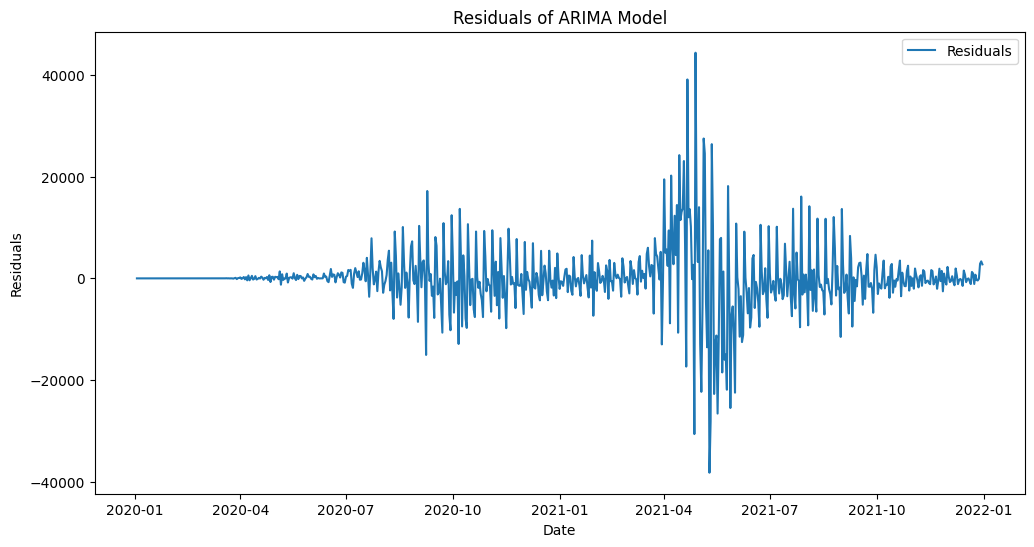

In [ ]:
# Print model summary
print(results.summary())

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.legend(loc='best')
plt.show()

### Forecasting

Now we can use ARIMA to make forecasts

In [ ]:
import numpy as np

<ipython-input-50-6b7ee609363f>:9: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


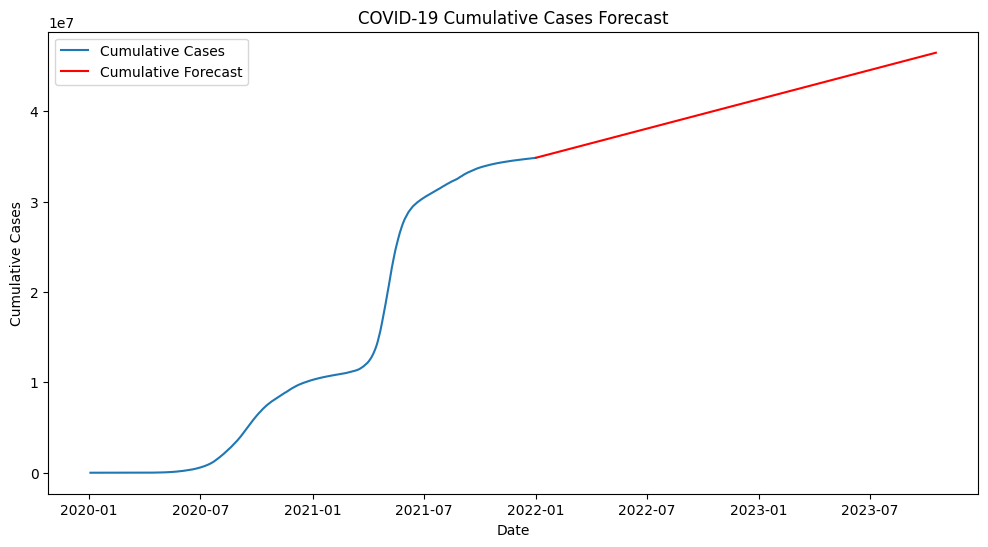

In [ ]:
# Forecast for the specified number of steps
forecast_steps = 655  # Adjust this value to match the number of steps you want to forecast
forecast = results.forecast(steps=forecast_steps)

# Calculate the cumulative forecast
cumulative_forecast = data['Cumulative_cases'].iloc[-1] + np.cumsum(forecast)

# Create a date range for the forecast
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the original data and the cumulative forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.plot(date_range, cumulative_forecast, label='Cumulative Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Forecast')
plt.legend(loc='best')
plt.show()

## Now let's use a more advanced model called the **Seasonal ARIMA(SARIMA) model**.

SARIMA takes into account seasonality, trend, and autoregressive and moving average components, which can be more suitable for modeling disease spread during a pandemic.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, S)
p, d, q = 1, 1, 1  # Autoregressive, differencing, and moving average orders
P, D, Q, S = 1, 1, 1, 7  # Seasonal orders (7 for weekly seasonality)

In [ ]:
# Fit the SARIMA model
model = SARIMAX(data['Cumulative_cases'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast for the specified number of steps
forecast_steps = 655  # Adjust this value to match the number of steps you want to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

<ipython-input-55-94e0b1977074>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


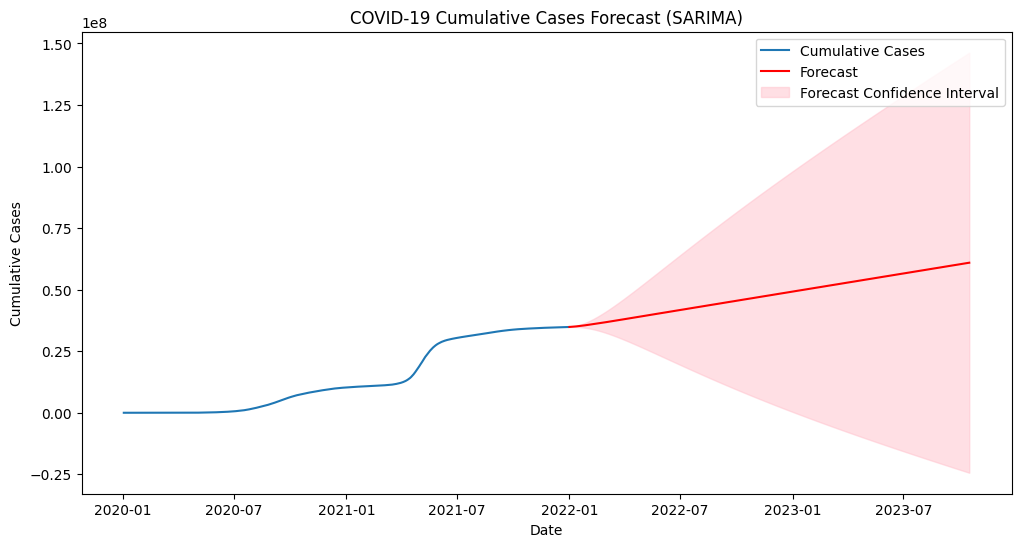

In [ ]:
# Create a date range for the forecast with the correct number of steps
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.plot(date_range, forecast_values, label='Forecast', color='red')
plt.fill_between(date_range, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Forecast Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Forecast (SARIMA)')
plt.legend(loc='best')
plt.show()

## Assessing Forecast Accuracy

We can calculate different forecast error metrics, such as
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

This can help to assess how well your forecast aligns with the actual data. These metrics measure the magnitude of errors between the forecast and actual values.

In [ ]:
# Loading the 2022-2023 Dataset
actual_data = pd.read_csv(f'/content/drive/MyDrive/AI ML Project/dataset/COVID-2022-2023-{country}.csv')

In [ ]:
# Data Preprocessing
# Display the first few rows of the dataset to inspect its structure
print(actual_data.head())

  Date_reported Country_code Country WHO_region  New_cases  Cumulative_cases  \
0    2022-01-01           IN   India      SEARO      22775          34861579   
1    2022-01-02           IN   India      SEARO      27553          34889132   
2    2022-01-03           IN   India      SEARO      33750          34922882   
3    2022-01-04           IN   India      SEARO      37379          34960261   
4    2022-01-05           IN   India      SEARO      58097          35018358   

   New_deaths  Cumulative_deaths  
0         406             481486  
1         284             481770  
2         123             481893  
3         124             482017  
4         534             482551  


In [ ]:
# Check for missing values
missing_values = actual_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [ ]:
# Remove duplicates if any
actual_data.drop_duplicates(inplace=True)

In [ ]:
# Convert the 'Date_reported' column to datetime data type
actual_data['Date_reported'] = pd.to_datetime(actual_data['Date_reported'])

In [ ]:
# Set Date_reported as the index
actual_data.set_index('Date_reported', inplace=True)

In [ ]:
# Sort the DataFrame by date in ascending order
actual_data.sort_index(inplace=True)

In [ ]:
# Assessing Forecase Accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate forecast errors
actual_values = actual_data['Cumulative_cases'][-forecast_steps:]
forecast_errors = forecast_values - actual_values

# new_forecast_values = forecast_values - 1
# Calculate error metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root of Mean Squared Error: {rmse}")


Mean Absolute Error: 6121511.614424957
Mean Squared Error: 57487972190024.15
Root of Mean Squared Error: 7582082.312269114


<ipython-input-64-0c5bf66e67a3>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  error_date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


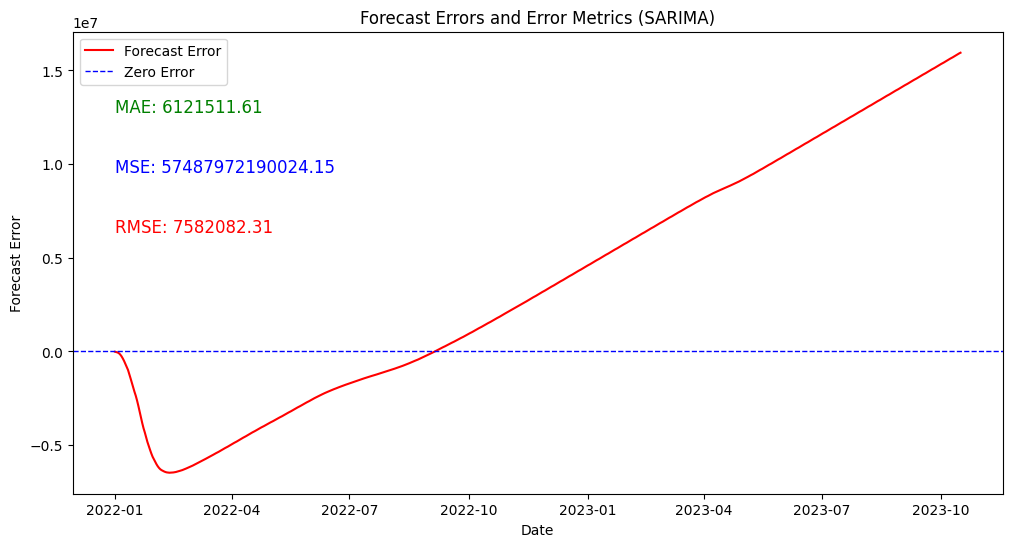

In [ ]:
# Create a date range for the forecast errors with the same number of elements
error_date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Trim forecast_errors to match the length of error_date_range
forecast_errors = forecast_errors[-forecast_steps:]

# Calculate error metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = sqrt(mse)

# Plot the forecast errors along with error metrics
plt.figure(figsize=(12, 6))
plt.plot(error_date_range, forecast_errors, label='Forecast Error', color='red')
plt.axhline(0, color='blue', linestyle='--', linewidth=1, label='Zero Error')

# Annotate the error metrics on the plot with adjusted vertical positions
label_offset = forecast_errors.max() / 5
plt.text(error_date_range[0], forecast_errors.max() - label_offset, f'MAE: {mae:.2f}', fontsize=12, color='green')
plt.text(error_date_range[0], forecast_errors.max() - 2 * label_offset, f'MSE: {mse:.2f}', fontsize=12, color='blue')
plt.text(error_date_range[0], forecast_errors.max() - 3 * label_offset, f'RMSE: {rmse:.2f}', fontsize=12, color='red')


plt.xlabel('Date')
plt.ylabel('Forecast Error')
plt.title('Forecast Errors and Error Metrics (SARIMA)')
plt.legend(loc='best')
plt.show()


## **Conclusion**

The project aimed to leverage AI and ML techniques for predicting disease spread, with a focus on pandemic preparedness. Key takeaways and a future scope for the project can be summarized as follows:

1. **Data Collection & Preprocessing:** Data collection from reliable sources such as the World Health Organization (WHO) is crucial. Proper preprocessing, including cleaning and formatting the data, is essential for accurate modeling.
2. **Visualization:** Visualizing the data using tools like Matplotlib and Seaborn helps in understanding the trends and patterns in disease spread, which can be critical for decision-makers.
3. **Time Series Analysis:** Time series analysis, including the use of ARIMA and SARIMA models, provides valuable insights into disease spread. The SARIMA model, with its ability to handle seasonality, often performs well for cumulative data like disease cases.
4. **Model Evaluation:** Accurate model evaluation is vital. Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) help assess model performance.

## **Future Scope**

- **Feature Engineering:** Implementing feature engineering can enhance model performance. You can consider adding relevant external factors or covariates, such as public health interventions, weather data, and population demographics, to improve forecasting accuracy.
- **Ensemble Models:** Explore the use of ensemble models, which combine multiple forecasting methods, for improved accuracy and robustness.
- **Real-time Data:** Incorporate real-time data feeds to continuously update and refine your predictions, making the system adaptable to changing conditions during a pandemic.
- **Machine Learning Interpretability:** Implement machine learning interpretability techniques to provide insights into the model's decision-making process, enabling better understanding and trust in the predictions.